<a href="https://colab.research.google.com/github/Izuho/computer-graphics/blob/main/9-18/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import distutils
if distutils.version.LooseVersion(tf.__version__) <= '2.0':
    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/fashion_mnist.ipynb')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
print('学習用写真 : ', x_train.shape, '\n学習用ラベル : ', y_train.shape, '\nテスト用写真 : ', x_test.shape, '\nテスト用ラベル : ', y_test.shape)

学習用写真 :  (60000, 28, 28) 
学習用ラベル :  (60000,) 
テスト用写真 :  (10000, 28, 28) 
テスト用ラベル :  (10000,)


In [12]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.5445 - accuracy: 0.8041 - val_loss: 0.4039 - val_accuracy: 0.8497
Epoch 2/10
1250/1250 [==============================] - 47s 37ms/step - loss: 0.3530 - accuracy: 0.8714 - val_loss: 0.3314 - val_accuracy: 0.8790
Epoch 3/10
1250/1250 [==============================] - 46s 37ms/step - loss: 0.2988 - accuracy: 0.8885 - val_loss: 0.2946 - val_accuracy: 0.8931
Epoch 4/10
1250/1250 [==============================] - 46s 37ms/step - loss: 0.2669 - accuracy: 0.9025 - val_loss: 0.2965 - val_accuracy: 0.8923
Epoch 5/10
1250/1250 [==============================] - 46s 37ms/step - loss: 0.2389 - accuracy: 0.9112 - val_loss: 0.2789 - val_accuracy: 0.9000
Epoch 6/10
1250/1250 [==============================] - 47s 37ms/step - loss: 0.2161 - accuracy: 0.9191 - val_loss: 0.2614 - val_accuracy: 0.9053
Epoch 7/10
1250/1250 [==============================] - 47s 38ms/step - loss: 0.1956 - accuracy: 0.9269 - val_loss: 0.2686 -

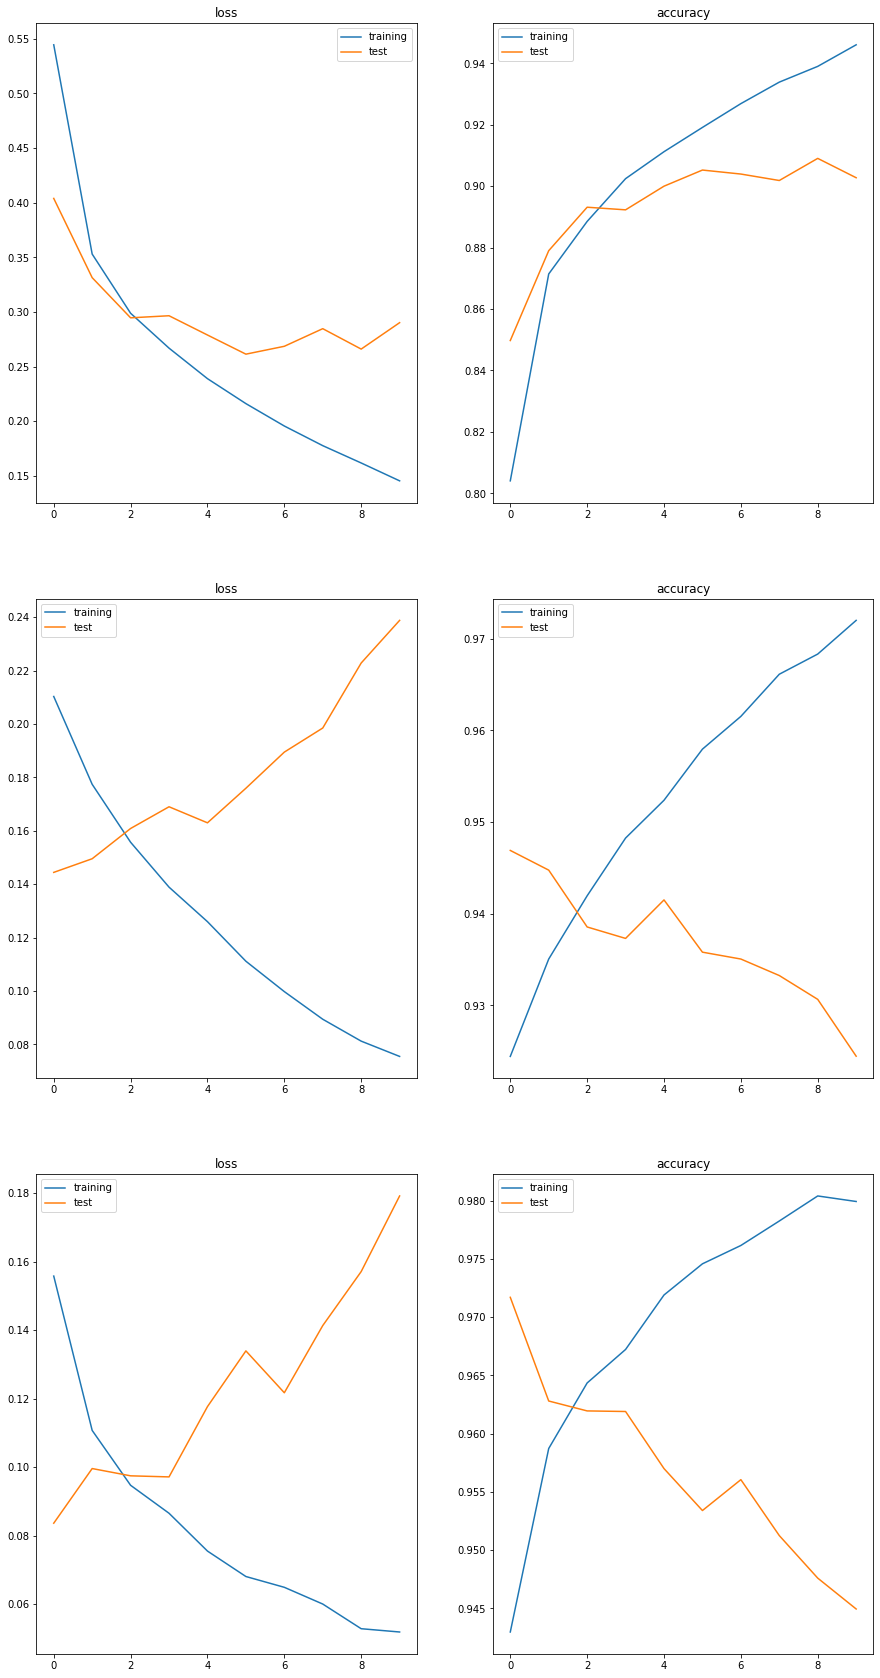

In [15]:
import matplotlib.pyplot as plt
import numpy as np
#KFoldのインポート
from sklearn.model_selection import KFold
 

K = 3
#KFoldの設定
kf = KFold(n_splits = K, shuffle = True, random_state = 1)
j = 0
plt.figure(figsize=(15, 30))  # グラフを表示するスペースを用意
 
#交差検証
for train, test in kf.split(x_train):
    
    history = model.fit(x_train[train],
                        y_train[train],
                        validation_data = (x_train[test], y_train[test]), 
                        epochs = 10)

    metrics = ['loss', 'accuracy']  # 使用する評価関数を指定

    for i in range(len(metrics)):
        j += 1

        metric = metrics[i]

        plt.subplot(3, 2, j)
        plt.title(metric)  # グラフのタイトルを表示
    
        plt_train = history.history[metric]  # historyから訓練データの評価を取り出す
        plt_test = history.history['val_' + metric]  # historyからテストデータの評価を取り出す
    
        plt.plot(plt_train, label='training')  # 訓練データの評価をグラフにプロット
        plt.plot(plt_test, label='test')  # テストデータの評価をグラフにプロット
        plt.legend()  # ラベルの表示
    
plt.show()  # グラフの表示